# Introduction
- identify ranges, outliers, trends, patterns, missing values (imputative, drop), categorization (for ML), encoding
- consider combining some features if they show similar trends as the target variable. Could be revealed using feature ranking too.

### Imports
Import libraries and write settings here.

In [23]:
import matplotlib 
# Specify renderer
# matplotlib.use('Agg')

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Boiler-plate settings for producing pub-quality figures
# 1 point = 1/72 inch
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
matplotlib.rcParams.update({'figure.figsize': (8, 5)    # inches
                            , 'font.size': 22      # points
                            , 'legend.fontsize': 16      # points
                            , 'lines.linewidth': 1.5       # points
                            , 'axes.linewidth': 1.5       # points
                            , 'text.usetex': False    # Use LaTeX to layout text
                            , 'font.family': "serif"  # Use serifed fonts
                            , 'xtick.major.size': 10     # length, points
                            , 'xtick.major.width': 1.5     # points
                            , 'xtick.minor.size': 6     # length, points
                            , 'xtick.minor.width': 1     # points
                            , 'ytick.major.size': 10     # length, points
                            , 'ytick.major.width': 1.5     # points
                            , 'ytick.minor.size': 6     # length, points
                            , "xtick.minor.visible": True
                            , "ytick.minor.visible": True
                            , 'font.weight': 'bold'
                            , 'ytick.minor.width': 1     # points
                            , 'font.serif': ("Times", "Palatino", "Computer Modern Roman", "New Century Schoolbook", "Bookman"), 'font.sans-serif': ("Helvetica", "Avant Garde", "Computer Modern Sans serif"), 'font.monospace': ("Courier", "Computer Modern Typewriter"), 'font.cursive': "Zapf Chancery"
                            })


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [187]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.feature_selection import SelectFromModel, VarianceThreshold, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

In [3]:
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

In [5]:
import sys
import logging
logging.basicConfig(level=logging.INFO, stream=sys.stdout)

%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp


import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

#Set the display format to be scientific for ease of analysis
# pd.options.display.float_format = '{:,.2g}'.format

In [188]:
#This is needed so we can display plotly plots properly
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [189]:
%load_ext watermark
%watermark -v -h -n -g -m -p jupyerlab,numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Thu Jul 02 2020 

CPython 3.7.6
IPython 7.13.0

jupyerlab not installed
numpy 1.18.1
scipy 1.4.1
sklearn 0.22.1
pandas 1.0.3
matplotlib 3.1.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
host name  : C02X61QTJHD5
Git hash   : 243c8326fdf94b6d4feca7bbb6ddb306584e87d4


In [90]:
data = pd.read_csv('../data/interim/cc_info_standardized_log.csv')

In [91]:
data.head()

custid      balance  balancefrequency  purchases  oneoffpurchases  \
0  C10001    40.900749          0.818182      95.40             0.00   
1  C10002  3202.467416          0.909091       0.00             0.00   
2  C10003  2495.148862          1.000000     773.17           773.17   
3  C10004  1666.670542          0.636364    1499.00          1499.00   
4  C10005   817.714335          1.000000      16.00            16.00   

   installmentspurchases  cashadvance  purchasesfrequency  \
0                   95.4     0.000000            0.166667   
1                    0.0  6442.945483            0.000000   
2                    0.0     0.000000            1.000000   
3                    0.0   205.788017            0.083333   
4                    0.0     0.000000            0.083333   

   oneoffpurchasesfrequency  purchasesinstallmentsfrequency  \
0                  0.000000                        0.083333   
1                  0.000000                        0.000000   
2                  1.000000                        0.000000   
3                  0.083333                        0.000000   
4                  0.083333                        0.000000   

   cashadvancefrequency     payments  balance_log  purchases_log  \
0              0.000000   201.802084     1.612792       1.980003   
1              0.250000  4103.032597     3.505498      -1.000000   
2              0.000000   622.066742     3.397114       2.888331   
3              0.083333     0.000000     3.221876       3.175831   
4              0.000000   678.334763     2.912655       1.206826   

   oneoffpurchases_log  installmentspurchases_log  cashadvance_log  \
0            -1.000000                   1.980003        -1.000000   
1            -1.000000                  -1.000000         3.809091   
2             2.888331                  -1.000000        -1.000000   
3             3.175831                  -1.000000         2.313631   
4             1.206826                  -1.000000        -1.000000   

   payments_log  balancefrequency_log  purchasesfrequency_log  \
0      2.305141             -0.037071               -0.574031   
1      3.613116              0.003930               -1.000000   
2      2.793907              0.041393                0.041393   
3     -1.000000             -0.132907               -0.736759   
4      2.831508              0.041393               -0.736759   

   oneoffpurchasesfrequency_log  purchasesinstallmentsfrequency_log  \
0                     -1.000000                           -0.736759   
1                     -1.000000                           -1.000000   
2                      0.041393                           -1.000000   
3                     -0.736759                           -1.000000   
4                     -0.736759                           -1.000000   

   cashadvancefrequency_log  
0                 -1.000000  
1                 -0.455932  
2                 -1.000000  
3                 -0.736759  
4                 -1.000000

In [92]:
data.columns

Index(['custid', 'balance', 'balancefrequency', 'purchases', 'oneoffpurchases',
       'installmentspurchases', 'cashadvance', 'purchasesfrequency',
       'oneoffpurchasesfrequency', 'purchasesinstallmentsfrequency',
       'cashadvancefrequency', 'payments', 'balance_log', 'purchases_log',
       'oneoffpurchases_log', 'installmentspurchases_log', 'cashadvance_log',
       'payments_log', 'balancefrequency_log', 'purchasesfrequency_log',
       'oneoffpurchasesfrequency_log', 'purchasesinstallmentsfrequency_log',
       'cashadvancefrequency_log'],
      dtype='object')

In [93]:
df = data
df.drop(columns=['purchases', 'oneoffpurchases', 'installmentspurchases', 'cashadvance', 
                 'payments', 'balance',
                'purchases_log',
                'oneoffpurchases_log',
                'balancefrequency_log', 'purchasesfrequency_log',
       'oneoffpurchasesfrequency_log', 'purchasesinstallmentsfrequency_log',
       'cashadvancefrequency_log','installmentspurchases_log', 'cashadvance_log',
                 'payments_log'], inplace=True)
df.head()

custid  balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
0  C10001          0.818182            0.166667                  0.000000   
1  C10002          0.909091            0.000000                  0.000000   
2  C10003          1.000000            1.000000                  1.000000   
3  C10004          0.636364            0.083333                  0.083333   
4  C10005          1.000000            0.083333                  0.083333   

   purchasesinstallmentsfrequency  cashadvancefrequency  balance_log  
0                        0.083333              0.000000     1.612792  
1                        0.000000              0.250000     3.505498  
2                        0.000000              0.000000     3.397114  
3                        0.000000              0.083333     3.221876  
4                        0.000000              0.000000     2.912655

       balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
count           8942.00             8942.00                   8942.00   
mean               0.88                0.49                      0.20   
std                0.24                0.40                      0.30   
min                0.00                0.00                      0.00   
25%                0.89                0.08                      0.00   
50%                1.00                0.50                      0.08   
75%                1.00                0.92                      0.30   
max                1.00                1.00                      1.00   

       purchasesinstallmentsfrequency  cashadvancefrequency  balance_log  
count                         8942.00               8942.00      8942.00  
mean                             0.36                  0.13         2.66  
std                              0.40                  0.20         0.93  
min                              0.00     

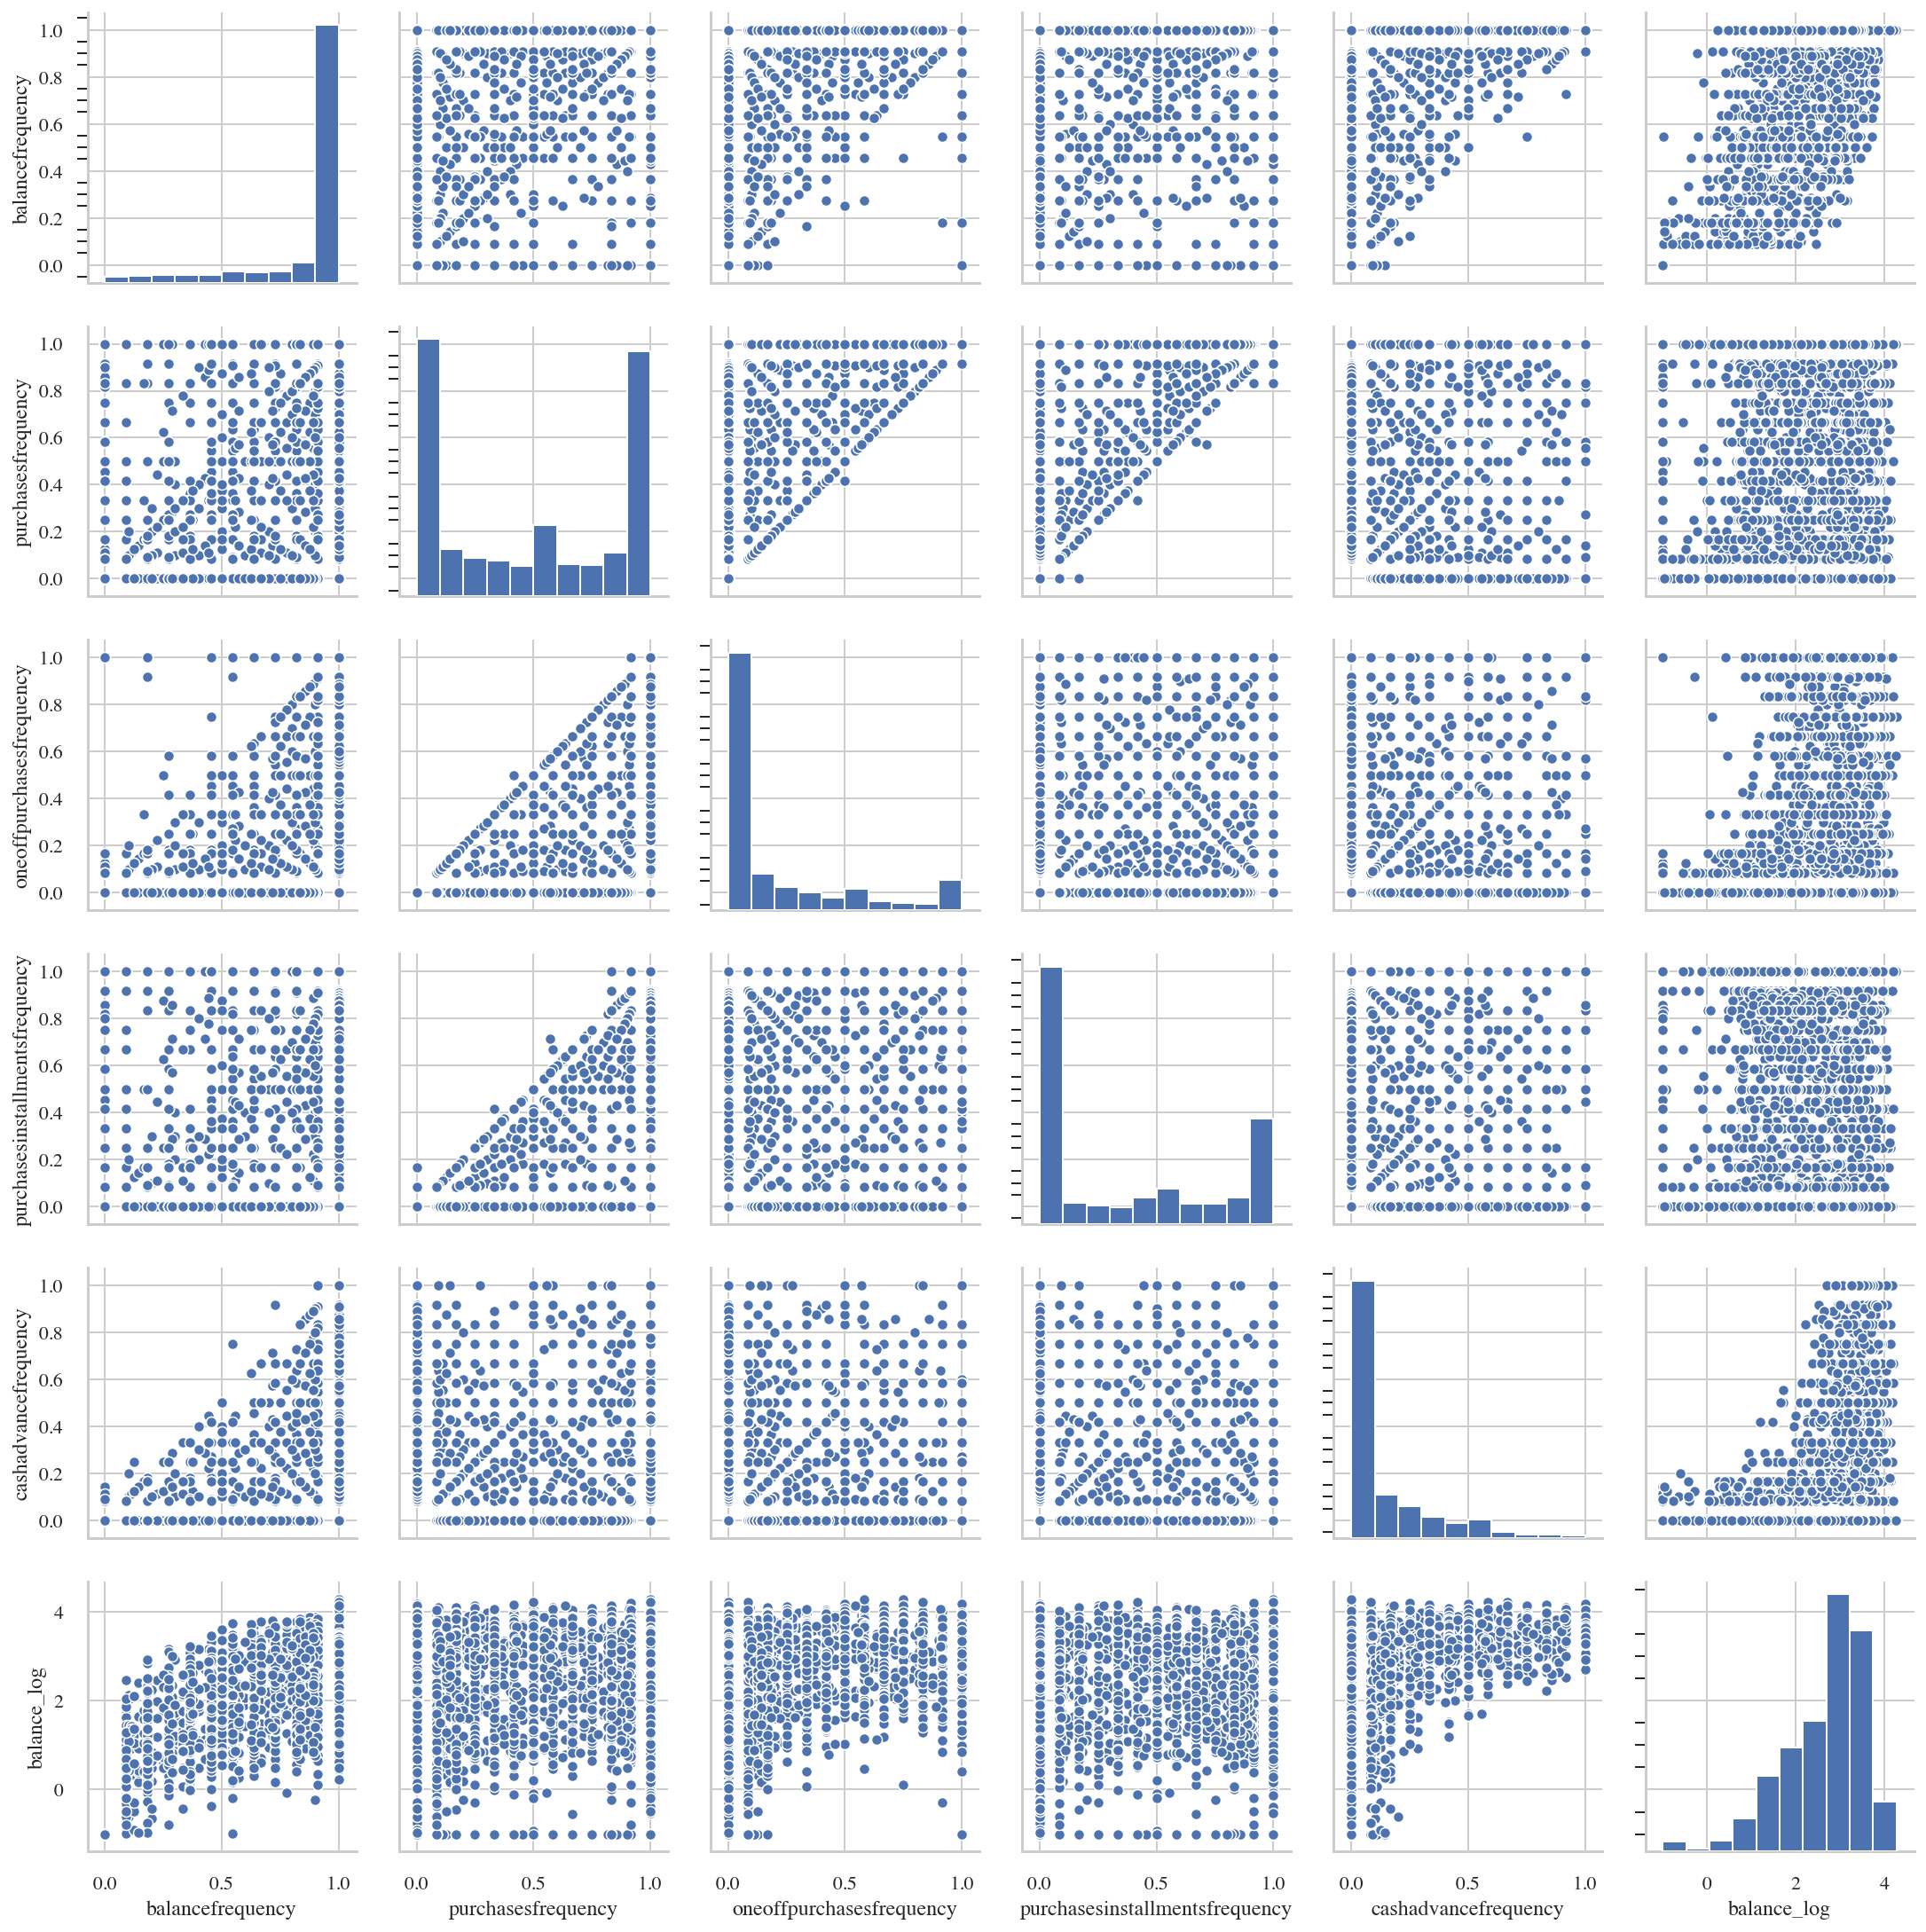

In [94]:
# identify ranges, outliers again
print(df.describe().round(2))

# find outliers, trends, patterns, plot histograms, correlation plots
sns.pairplot(df)
plt.show()



In [95]:
def minMax(x):
    return pd.Series(index=['min','max'], data=[x.min(),x.max()])
df.select_dtypes(include=[np.number]).apply(minMax)

balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
min               0.0                 0.0                       0.0   
max               1.0                 1.0                       1.0   

     purchasesinstallmentsfrequency  cashadvancefrequency  balance_log  
min                             0.0                   0.0    -1.000000  
max                             1.0                   1.0     4.279741

In [96]:
# standardize 
from sklearn import preprocessing
X = df.select_dtypes(include=[np.number])
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [97]:
X_scaled.describe()

balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
count      8.942000e+03        8.942000e+03              8.942000e+03   
mean       3.401265e-15        9.456140e-16             -5.248467e-15   
std        1.000056e+00        1.000056e+00              1.000056e+00   
min       -3.701627e+00       -1.222447e+00             -6.786039e-01   
25%        4.941287e-02       -1.014828e+00             -6.786039e-01   
50%        5.182923e-01        2.327462e-02             -3.993549e-01   
75%        5.182923e-01        1.061377e+00              3.266968e-01   
max        5.182923e-01        1.268997e+00              2.672398e+00   

       purchasesinstallmentsfrequency  cashadvancefrequency   balance_log  
count                    8.942000e+03          8.942000e+03  8.942000e+03  
mean                    -5.146608e-16         -1.005508e-15  2.564333e-17  
std                      1.000056e+00          1.000056e+00  1.000056e+00  
min                     -9.177506e-01         -6.789784e-01 -3.946796e+00  
25%                     -9.177506e-01         -6.789784e-01 -5.928656e-01  
50%                     -4.984137e-01         -6.789784e-01  3.057141e-01  
75%                      9.692615e-01          4.453598e-01  7.058779e-01  
max                      1.598266e+00          4.380548e+00  1.751313e+00

## put into different bins for some features? like frequent, mild, never?

In [ ]:
# add a col where it says what's your dominant usage of the CC?
# but are they mutually exclusive?

# Analysis/Modeling
 A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. 
 
 As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. Sh/e is especially interested in getting an idea of **which benefits to associate with each new card offering**. 



clustering algo:
- k-means
- GMM
- DBscan

In [75]:
X_scaled.columns

Index(['balancefrequency', 'purchasesfrequency', 'oneoffpurchasesfrequency',
       'purchasesinstallmentsfrequency', 'cashadvancefrequency',
       'balance_log'],
      dtype='object')

k=3


(-0.1, 1)

(0, 8982)

Text(-0.05, 725.5, '0')

Text(-0.05, 3259.5, '1')

Text(-0.05, 7025.0, '2')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature i.e. balancefrequency')

Text(0, 0.5, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 3')

k=4


(-0.1, 1)

(0, 8992)

Text(-0.05, 1773.5, '0')

Text(-0.05, 4337.5, '1')

Text(-0.05, 6379.5, '2')

Text(-0.05, 8306.5, '3')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature i.e. balancefrequency')

Text(0, 0.5, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 4')

k=5


(-0.1, 1)

(0, 9002)

Text(-0.05, 661.5, '0')

Text(-0.05, 2743.0, '1')

Text(-0.05, 4917.5, '2')

Text(-0.05, 6836.0, '3')

Text(-0.05, 8501.0, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature i.e. balancefrequency')

Text(0, 0.5, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 5')

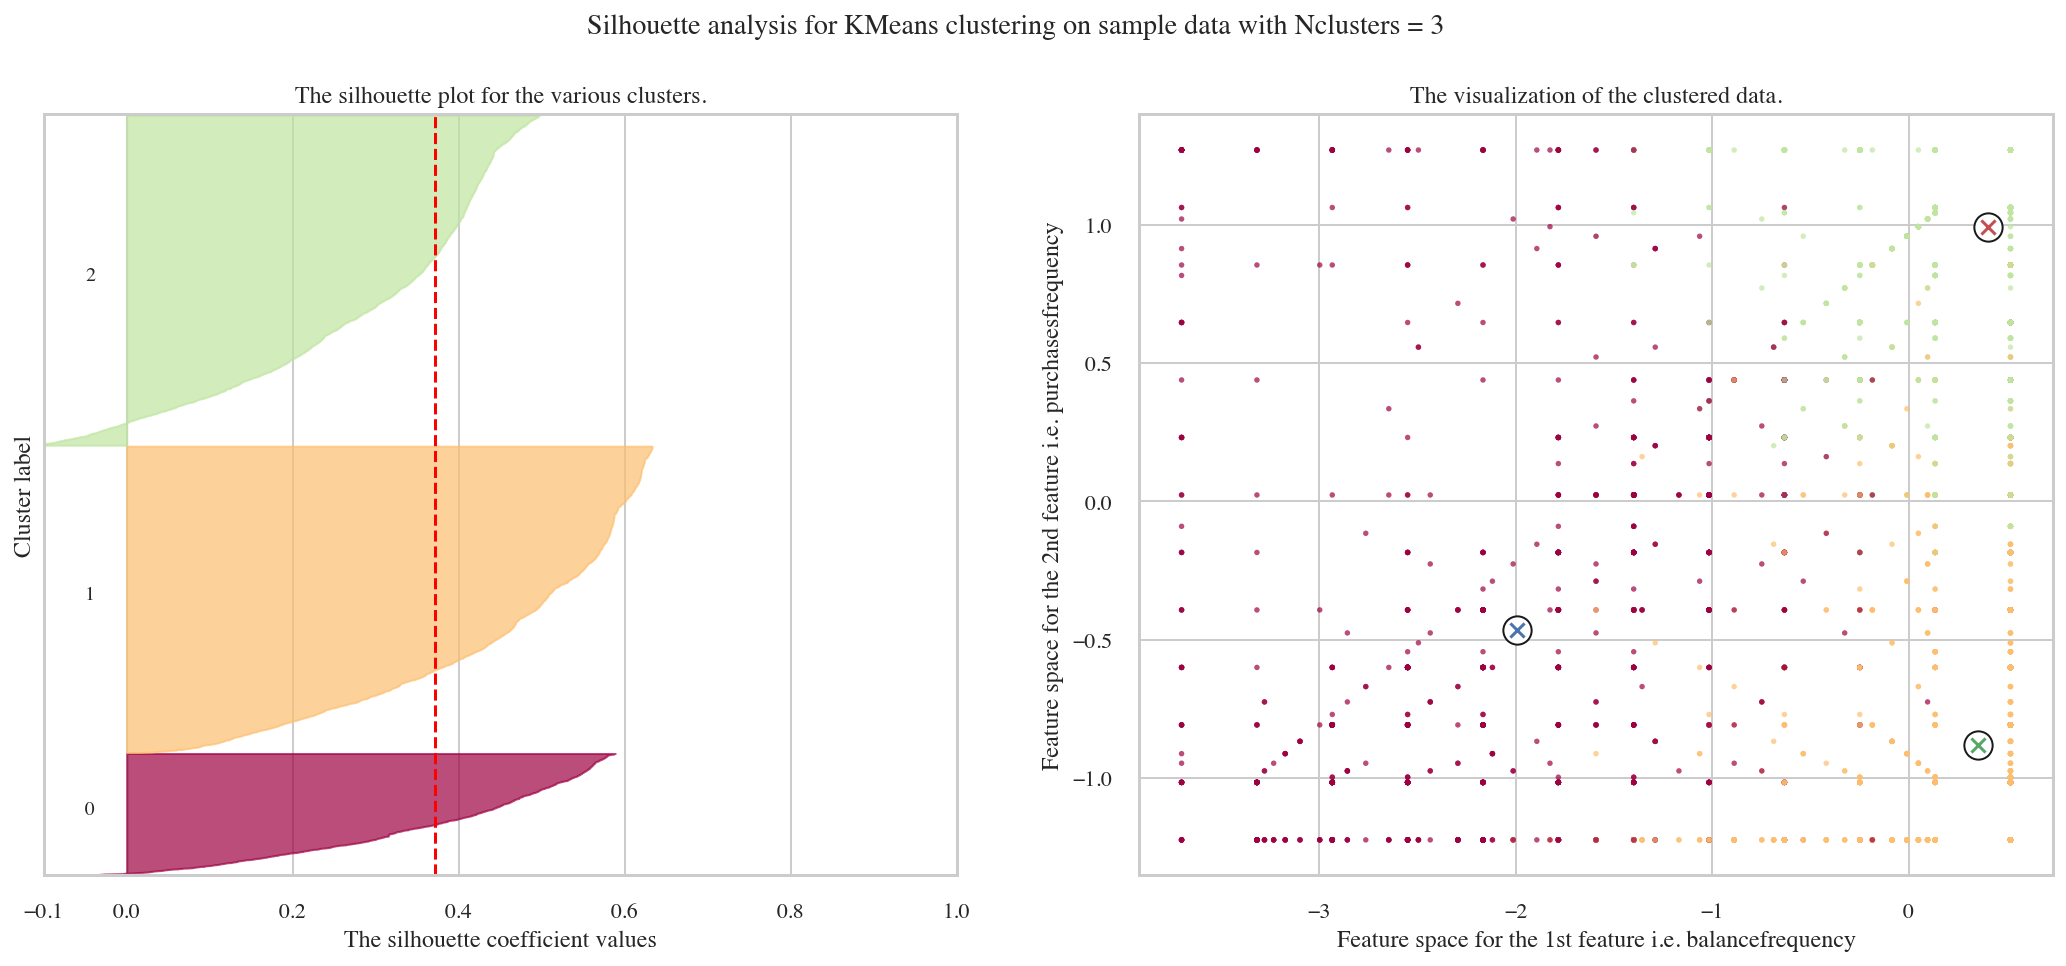

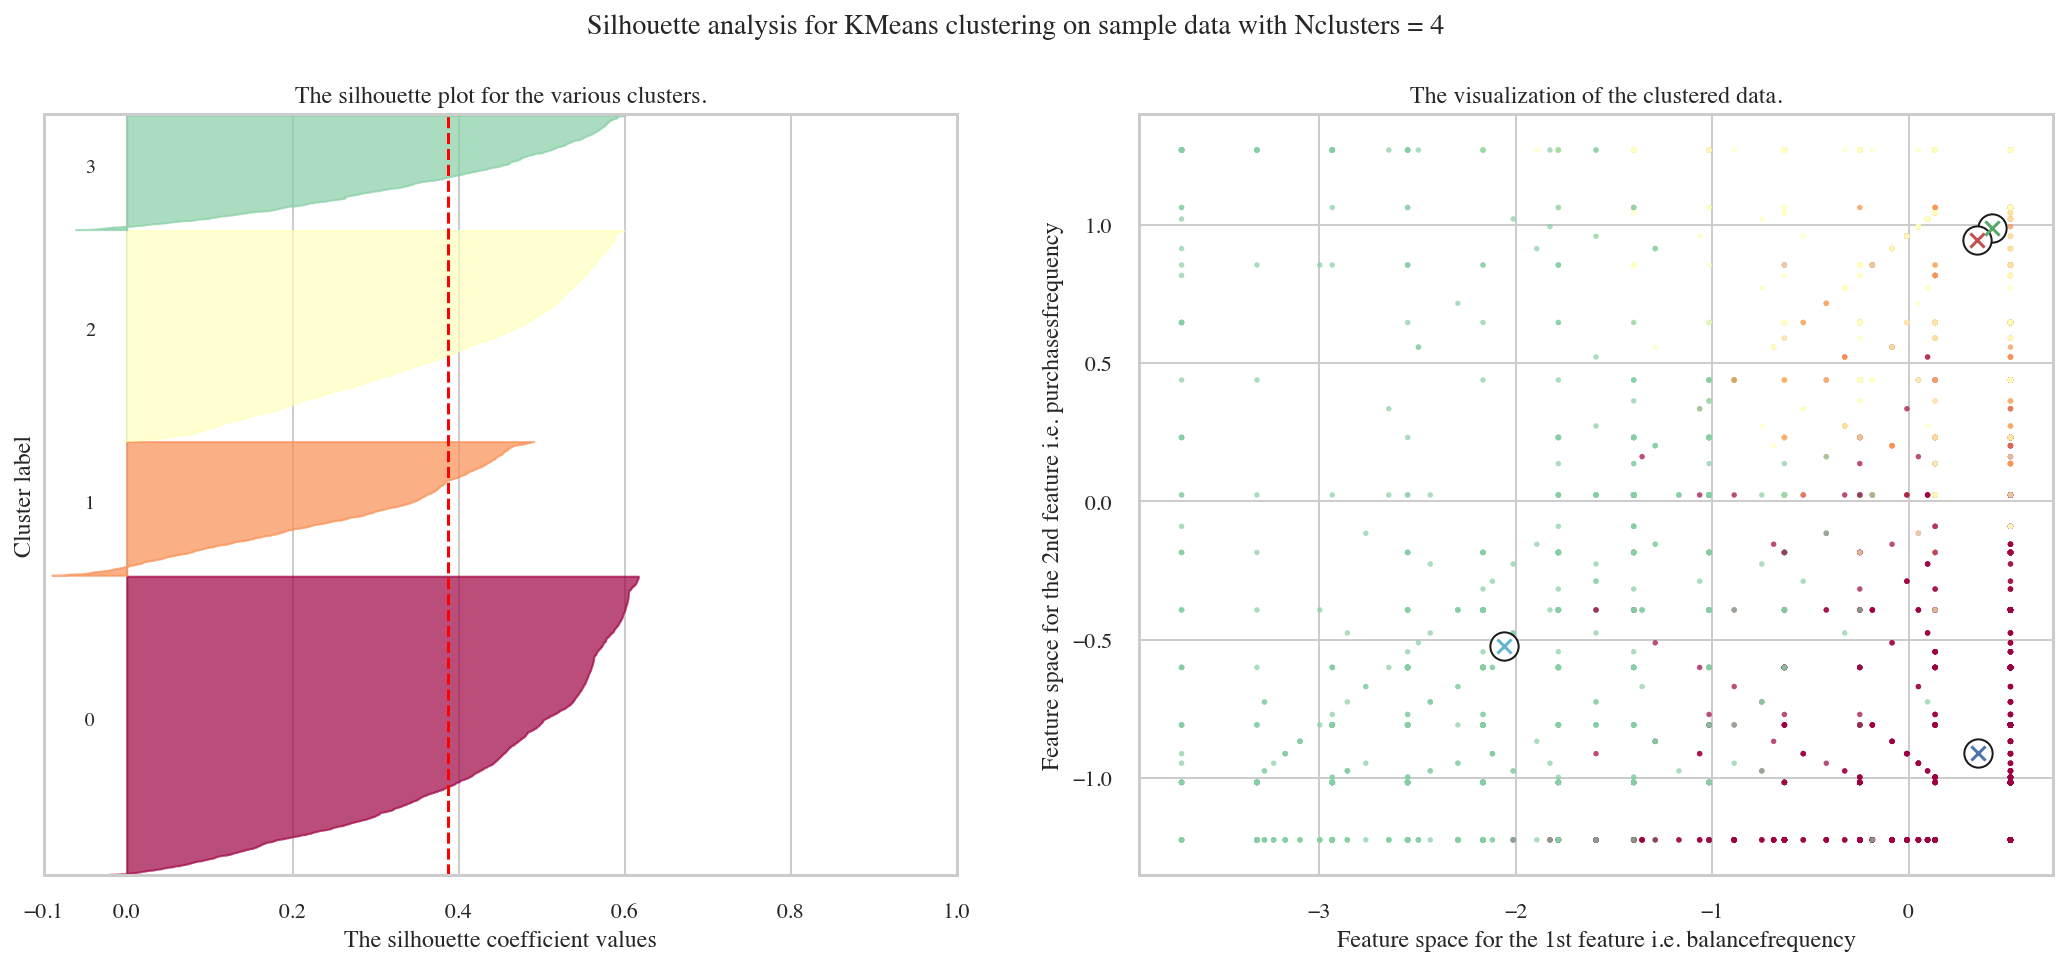

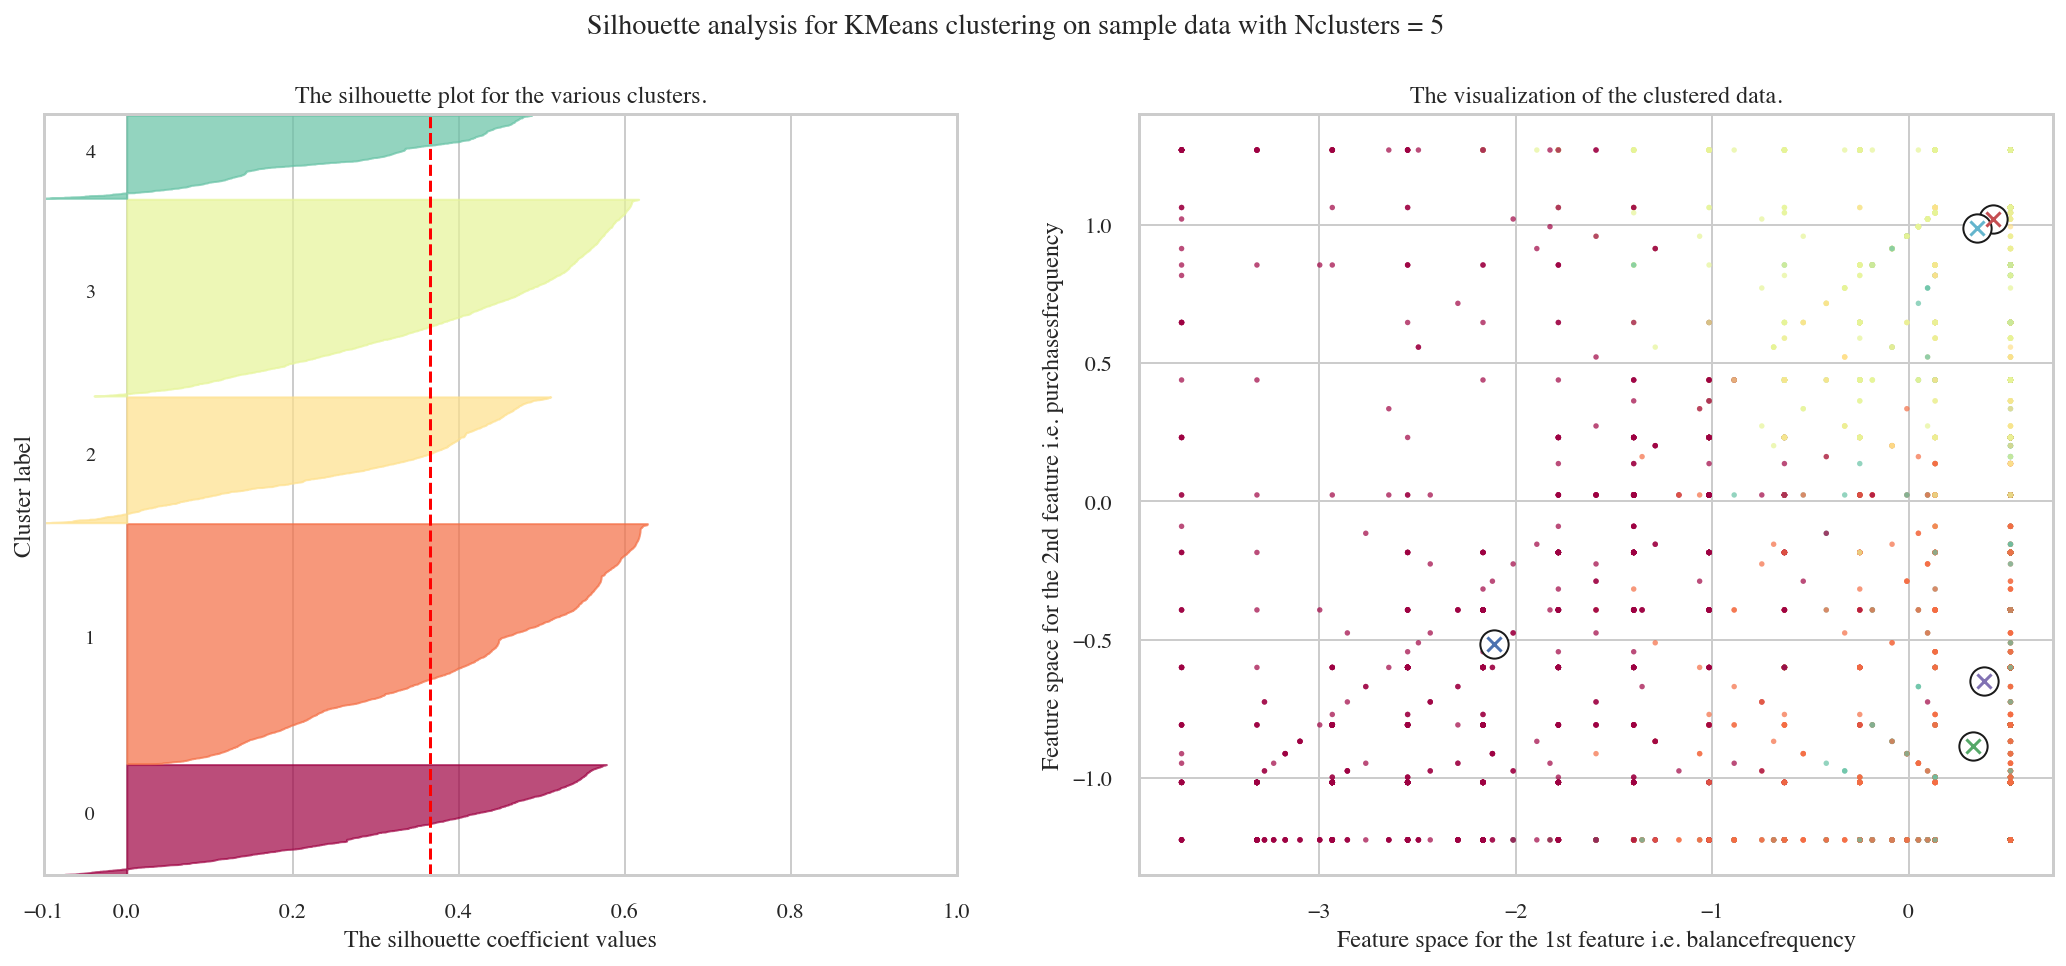

In [34]:


X = X_scaled

cluster_centers = dict()
kmeans_per_k = []

for n_clusters in range(3,6,1):
    print("k={}".format(n_clusters))    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    kmeans_per_k.append(clusterer)
    
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 1
    
    ax2.scatter(X.iloc[:, feature1], X.iloc[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='x', alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. balancefrequency")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. purchasesfrequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with Nclusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()
    

## Elbow curve

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Inertia')

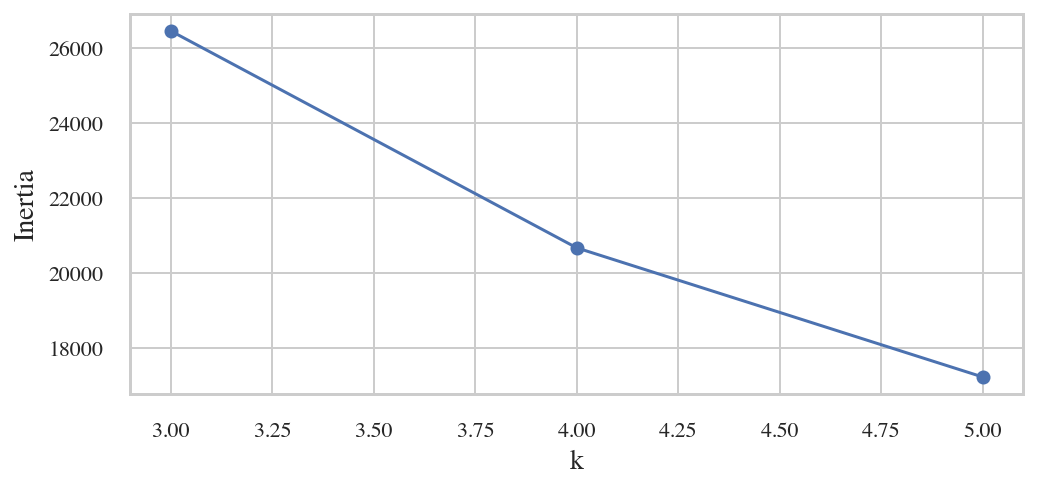

In [35]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(3, 6, 1), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[2]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.axis([2, 8.5, 0, 8300])
plt.show()

In [36]:
# find cluster centers and re-transforming back to normal from scaled version
for i in range(3,6,1):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame((cent_transformed), columns=X_scaled.columns))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
   balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
0          0.404992            0.303779                  0.071952   
1          0.961008            0.136988                  0.084566   
2          0.972841            0.888038                  0.360108   

   purchasesinstallmentsfrequency  cashadvancefrequency  balance_log  
0                        0.221193              0.028919     1.270446  
1                        0.053015              0.246018     3.163339  
2                        0.707264              0.068975     2.696132  
Silhouette score for cluster 3 is 0.37158871455318315

for 4 number of clusters
   balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
0          0.960793            0.125907                  0.077682   
1          0.977702            0.887319                  0.771902   
2          0.960098            0.869968                  0.087751   
3          0.388849            0.281014                  0

## repeat clustering, after putting into bins and then encode

In [98]:


def encode(df, fieldname):
    gen_ohe = OneHotEncoder()
    gen_feature_arr = gen_ohe.fit_transform(df[[fieldname]]).toarray()
    
    leg_feature_labels = [fieldname+'_'+str(cls_label) for cls_label in gen_ohe.categories_[0]]
    blah = pd.DataFrame(gen_feature_arr, columns=leg_feature_labels)
    return blah

In [99]:
df.columns

Index(['custid', 'balancefrequency', 'purchasesfrequency',
       'oneoffpurchasesfrequency', 'purchasesinstallmentsfrequency',
       'cashadvancefrequency', 'balance_log'],
      dtype='object')

In [114]:
# convert continuous to categorical
for i, ii in enumerate(df[['balancefrequency', 'purchasesfrequency',
       'oneoffpurchasesfrequency', 'purchasesinstallmentsfrequency',
       'cashadvancefrequency']]):
     df[f'{ii}_cat'] = pd.cut(df[ii], bins=4, 
                                     labels=['Rare', 'Mild', 'Average', 'Freq'])
    # count frequency in each bin
    pd.value_counts(df[f'{ii}_cat'])

    blah = encode(df, f'{ii}_cat')

    if i == 0:
        df_ohe = pd.concat([df[['custid', 'balance_log']], blah], axis=1) 
    else:
        df_ohe = pd.concat([df_ohe, blah], axis=1) 
df_ohe.iloc[4:10]    


Freq       7209
Average     779
Mild        603
Rare        351
Name: balancefrequency_cat, dtype: int64

Rare       3644
Freq       3104
Mild       1151
Average    1043
Name: purchasesfrequency_cat, dtype: int64

Rare       6682
Mild        917
Freq        782
Average     561
Name: oneoffpurchasesfrequency_cat, dtype: int64

Rare       4808
Freq       2169
Mild       1044
Average     921
Name: purchasesinstallmentsfrequency_cat, dtype: int64

Rare       7301
Mild       1114
Average     399
Freq        128
Name: cashadvancefrequency_cat, dtype: int64

custid  balance_log  balancefrequency_cat_Average  \
4  C10005     2.912655                           0.0   
5  C10006     3.257661                           0.0   
6  C10007     2.797517                           0.0   
7  C10008     3.260966                           0.0   
8  C10009     3.006477                           0.0   
9  C10010     2.182774                           1.0   

   balancefrequency_cat_Freq  balancefrequency_cat_Mild  \
4                        1.0                        0.0   
5                        1.0                        0.0   
6                        1.0                        0.0   
7                        1.0                        0.0   
8                        1.0                        0.0   
9                        0.0                        0.0   

   balancefrequency_cat_Rare  purchasesfrequency_cat_Average  \
4                        0.0                             0.0   
5                        0.0                             1.0   
6                        0.0                             0.0   
7                        0.0                             0.0   
8                        0.0                             0.0   
9                        0.0                             0.0   

   purchasesfrequency_cat_Freq  purchasesfrequency_cat_Mild  \
4                          0.0                          0.0   
5                          0.0                          0.0   
6                          1.0                          0.0   
7                          1.0                          0.0   
8                          0.0                          1.0   
9                          0.0                          0.0   

   purchasesfrequency_cat_Rare  oneoffpurchasesfrequency_cat_Average  \
4                          1.0                                   0.0   
5                          0.0                                   0.0   
6                          0.0                                   0.0   
7                          0.0                                   0.0   
8                          0.0                                   0.0   
9                          1.0                                   0.0   

   oneoffpurchasesfrequency_cat_Freq  oneoffpurchasesfrequency_cat_Mild  \
4                                0.0                                0.0   
5                                0.0                                0.0   
6                                1.0                                0.0   
7                                0.0                                0.0   
8                                0.0                                0.0   
9                                0.0                                0.0   

   oneoffpurchasesfrequency_cat_Rare  \
4                                1.0   
5                                1.0   
6                                0.0   
7                                1.0   
8                                1.0   
9                                1.0   

   purchasesinstallmentsfrequency_cat_Average  \
4                                         0.0   
5                                         1.0   
6                                         0.0   
7                                         0.0   
8                                         0.0   
9                                         0.0   

   purchasesinstallmentsfrequency_cat_Freq  \
4                                      0.0   
5                                      0.0   
6                                      1.0   
7                                      1.0   
8                                      0.0   
9                                      0.0   

   purchasesinstallmentsfrequency_cat_Mild  \
4                                      0.0   
5                                      0.0   
6                                      0.0   
7                                      0.0   
8                                      0.0   
9                                      0.0   

   

In [115]:
# people who usually owe low balance
(df_ohe['balance_log'] <= 1).sum()

475

In [118]:
df_ohe.drop(columns=['custid', 'balance_log'], inplace=True)

In [119]:
df_ohe.head()

balancefrequency_cat_Average  balancefrequency_cat_Freq  \
0                           0.0                        1.0   
1                           0.0                        1.0   
2                           0.0                        1.0   
3                           1.0                        0.0   
4                           0.0                        1.0   

   balancefrequency_cat_Mild  balancefrequency_cat_Rare  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   purchasesfrequency_cat_Average  purchasesfrequency_cat_Freq  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          1.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   purchasesfrequency_cat_Mild  purchasesfrequency_cat_Rare  \
0                          0.0                          1.0   
1                          0.0                          1.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          1.0   

   oneoffpurchasesfrequency_cat_Average  oneoffpurchasesfrequency_cat_Freq  \
0                                   0.0                                0.0   
1                                   0.0                                0.0   
2                                   0.0                                1.0   
3                                   0.0                                0.0   
4                                   0.0                                0.0   

   oneoffpurchasesfrequency_cat_Mild  oneoffpurchasesfrequency_cat_Rare  \
0                                0.0                                1.0   
1                                0.0                                1.0   
2                                0.0                                0.0   
3                                0.0                                1.0   
4                                0.0                                1.0   

   purchasesinstallmentsfrequency_cat_Average  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   purchasesinstallmentsfrequency_cat_Freq  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   purchasesinstallmentsfrequency_cat_Mild  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   purchasesinstallmentsfrequency_cat_Rare  cashadvancefrequency_cat_Average  \
0                                      1.0                               0.0   
1                                      1.0                               0.0   
2                                      1.0                               0.0   
3                                      1.0                               0.0   
4                                      1.0                               0.0   

   cashadvancefrequency_cat_Freq  cashadvancefrequency_cat_Mild  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                

In [122]:
df_ohe.describe()

balancefrequency_cat_Average  balancefrequency_cat_Freq  \
count                   8942.000000                8942.000000   
mean                       0.087117                   0.806195   
std                        0.282022                   0.395300   
min                        0.000000                   0.000000   
25%                        0.000000                   1.000000   
50%                        0.000000                   1.000000   
75%                        0.000000                   1.000000   
max                        1.000000                   1.000000   

       balancefrequency_cat_Mild  balancefrequency_cat_Rare  \
count                8942.000000                8942.000000   
mean                    0.067435                   0.039253   
std                     0.250787                   0.194207   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       purchasesfrequency_cat_Average  purchasesfrequency_cat_Freq  \
count                     8942.000000                  8942.000000   
mean                         0.116641                     0.347126   
std                          0.321009                     0.476083   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       purchasesfrequency_cat_Mild  purchasesfrequency_cat_Rare  \
count                  8942.000000                  8942.000000   
mean                      0.128718                     0.407515   
std                       0.334907                     0.491400   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     1.000000   
max                       1.000000                     1.000000   

       oneoffpurchasesfrequency_cat_Average  \
count                           8942.000000   
mean                               0.062738   
std                                0.242504   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       oneoffpurchasesfrequency_cat_Freq  oneoffpurchasesfrequency_cat_Mild  \
count                        8942.000000                        8942.000000   
mean                            0.087452                           0.102550   
std                             0.282513                           0.303387   
min                             0.000000                           0.000000   
25%                             0.000000                           0.000000   
50%                             0.000000                           0.000000   
75%                             0.000000                           0.000000   
max                             1.000000                           1.000000   

       oneoffpurchasesfrequency_cat_Rare  \
count                        8942.000000   
mean                            0.747260   
std                             0.434607   
min                             0.000000   
25%                             0.000000   
50%                             1.000000   
75%                             1.000000   
max                             1.000000   

       purchasesinstallmentsfrequency_cat_Average  \
count                  

But now we can't use k-means for this....

## DBSCAN

In [125]:
X = df_ohe
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
dbscan.labels_[:10]
len(dbscan.core_sample_indices_)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

array([0, 0, 1, 2, 0, 3, 4, 5, 6, 2])

8801

In [134]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores.iloc[:, 0], non_cores.iloc[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

<Figure size 648x230.4 with 0 Axes>

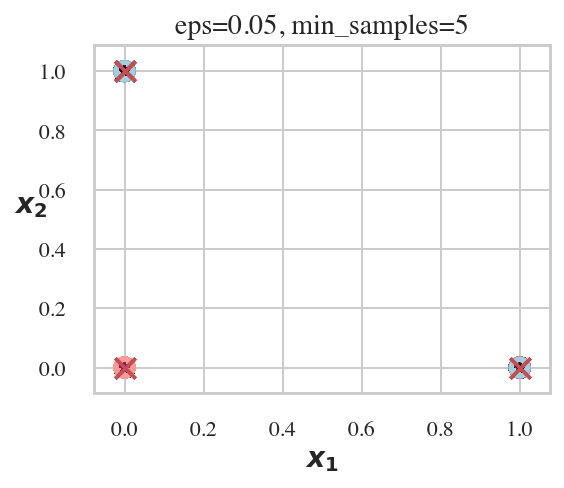

In [136]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

# plt.subplot(122)
# plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()

In [151]:
X_scaled.shape

(8942, 5)

## kmeans without putting the frequencies into bins -- so it's continous numerical values

In [163]:
X = df[['balancefrequency', 'purchasesfrequency',
       'oneoffpurchasesfrequency', 'purchasesinstallmentsfrequency',
       'cashadvancefrequency']]

In [164]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [165]:
X_scaled.columns

Index(['balancefrequency', 'purchasesfrequency', 'oneoffpurchasesfrequency',
       'purchasesinstallmentsfrequency', 'cashadvancefrequency'],
      dtype='object')

k=3


(-0.1, 1)

(0, 8982)

Text(-0.05, 730.0, '0')

Text(-0.05, 3437.5, '1')

Text(-0.05, 7198.5, '2')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0, 0.5, 'Feature space for the last feature i.e. cashadvancefrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 3')

k=4


(-0.1, 1)

(0, 8992)

Text(-0.05, 1727.5, '0')

Text(-0.05, 4747.0, '1')

Text(-0.05, 6820.0, '2')

Text(-0.05, 8291.5, '3')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0, 0.5, 'Feature space for the last feature i.e. cashadvancefrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 4')

k=5


(-0.1, 1)

(0, 9002)

Text(-0.05, 656.0, '0')

Text(-0.05, 2525.5, '1')

Text(-0.05, 4479.5, '2')

Text(-0.05, 6493.0, '3')

Text(-0.05, 8384.0, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0, 0.5, 'Feature space for the last feature i.e. cashadvancefrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 5')

k=6


(-0.1, 1)

(0, 9012)

Text(-0.05, 465.0, '0')

Text(-0.05, 1573.0, '1')

Text(-0.05, 3548.0, '2')

Text(-0.05, 5302.0, '3')

Text(-0.05, 6942.0, '4')

Text(-0.05, 8581.0, '5')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0, 0.5, 'Feature space for the last feature i.e. cashadvancefrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 6')

k=7


(-0.1, 1)

(0, 9022)

Text(-0.05, 1114.5, '0')

Text(-0.05, 2766.0, '1')

Text(-0.05, 4543.5, '2')

Text(-0.05, 6136.0, '3')

Text(-0.05, 7139.0, '4')

Text(-0.05, 8178.0, '5')

Text(-0.05, 8794.0, '6')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0, 0.5, 'Feature space for the last feature i.e. cashadvancefrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 7')

k=8


(-0.1, 1)

(0, 9032)

Text(-0.05, 1219.5, '0')

Text(-0.05, 3465.5, '1')

Text(-0.05, 4884.0, '2')

Text(-0.05, 5810.5, '3')

Text(-0.05, 6623.5, '4')

Text(-0.05, 7393.5, '5')

Text(-0.05, 8247.0, '6')

Text(-0.05, 8815.5, '7')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 2nd feature i.e. purchasesfrequency')

Text(0, 0.5, 'Feature space for the last feature i.e. cashadvancefrequency')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with Nclusters = 8')

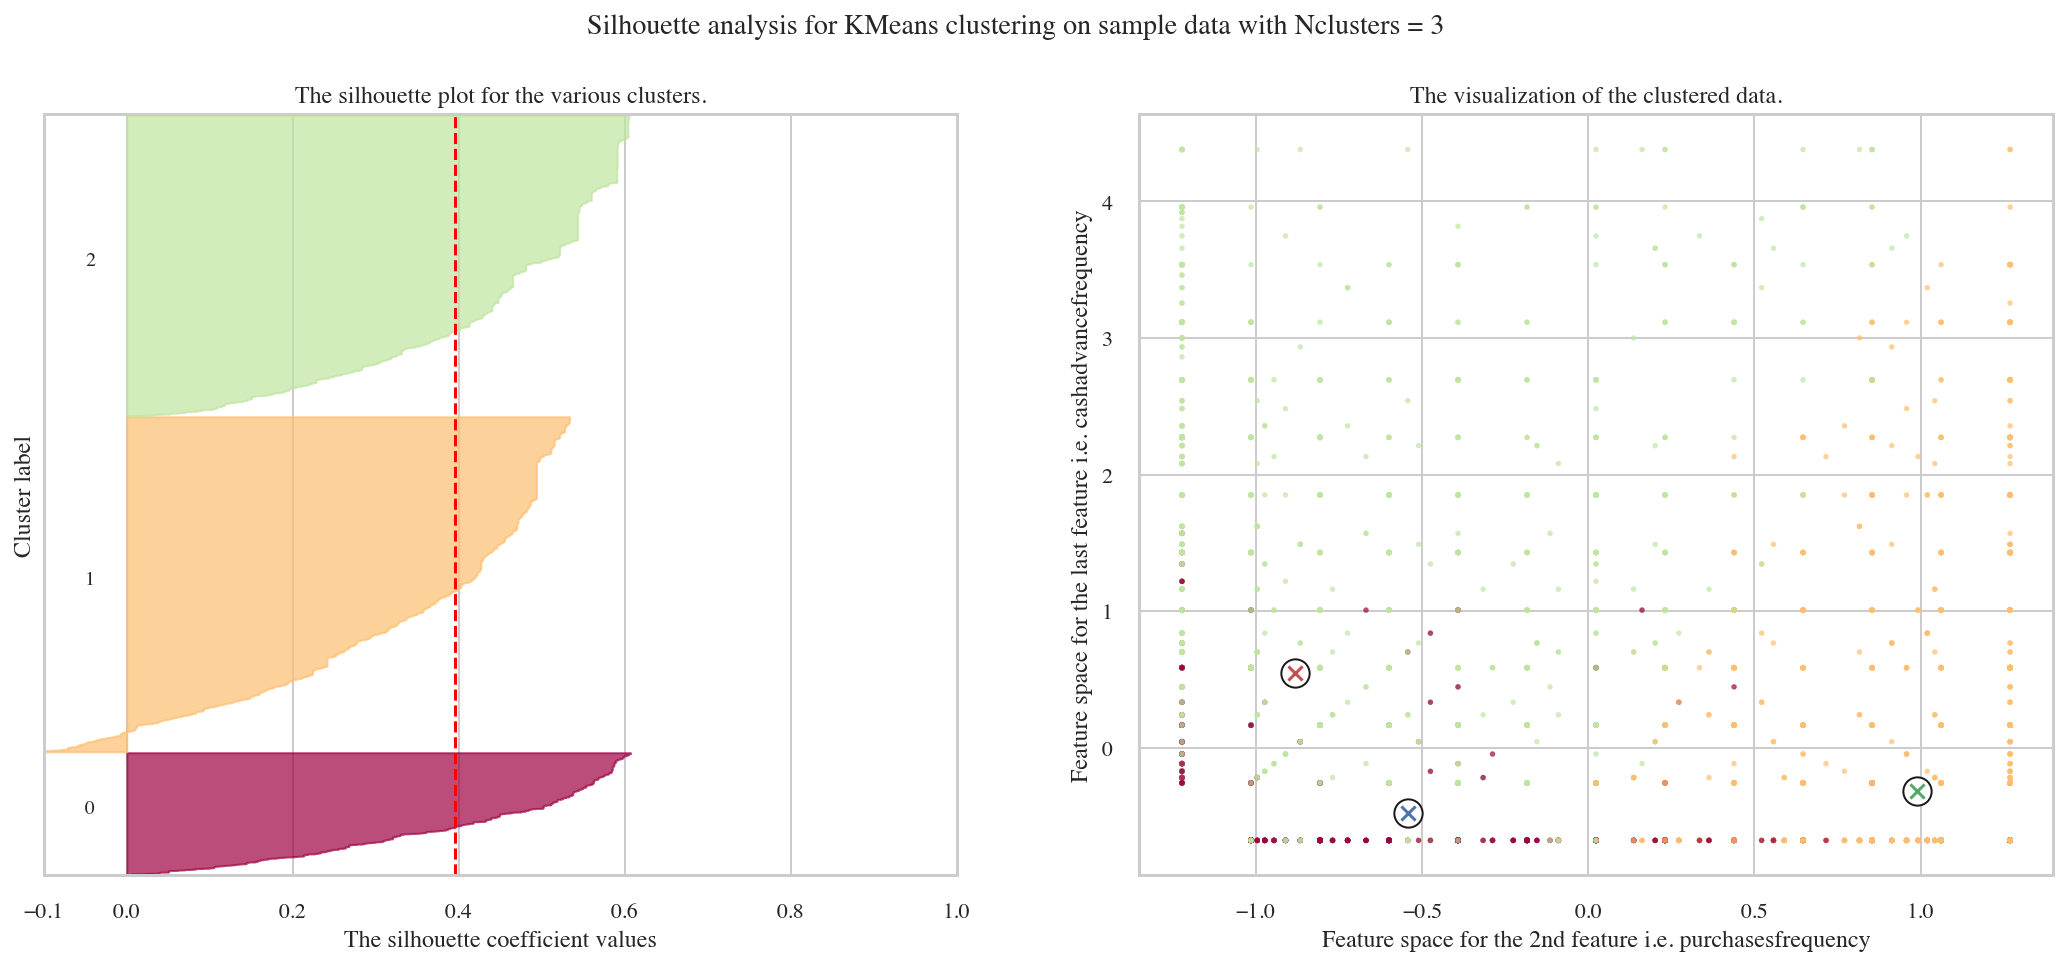

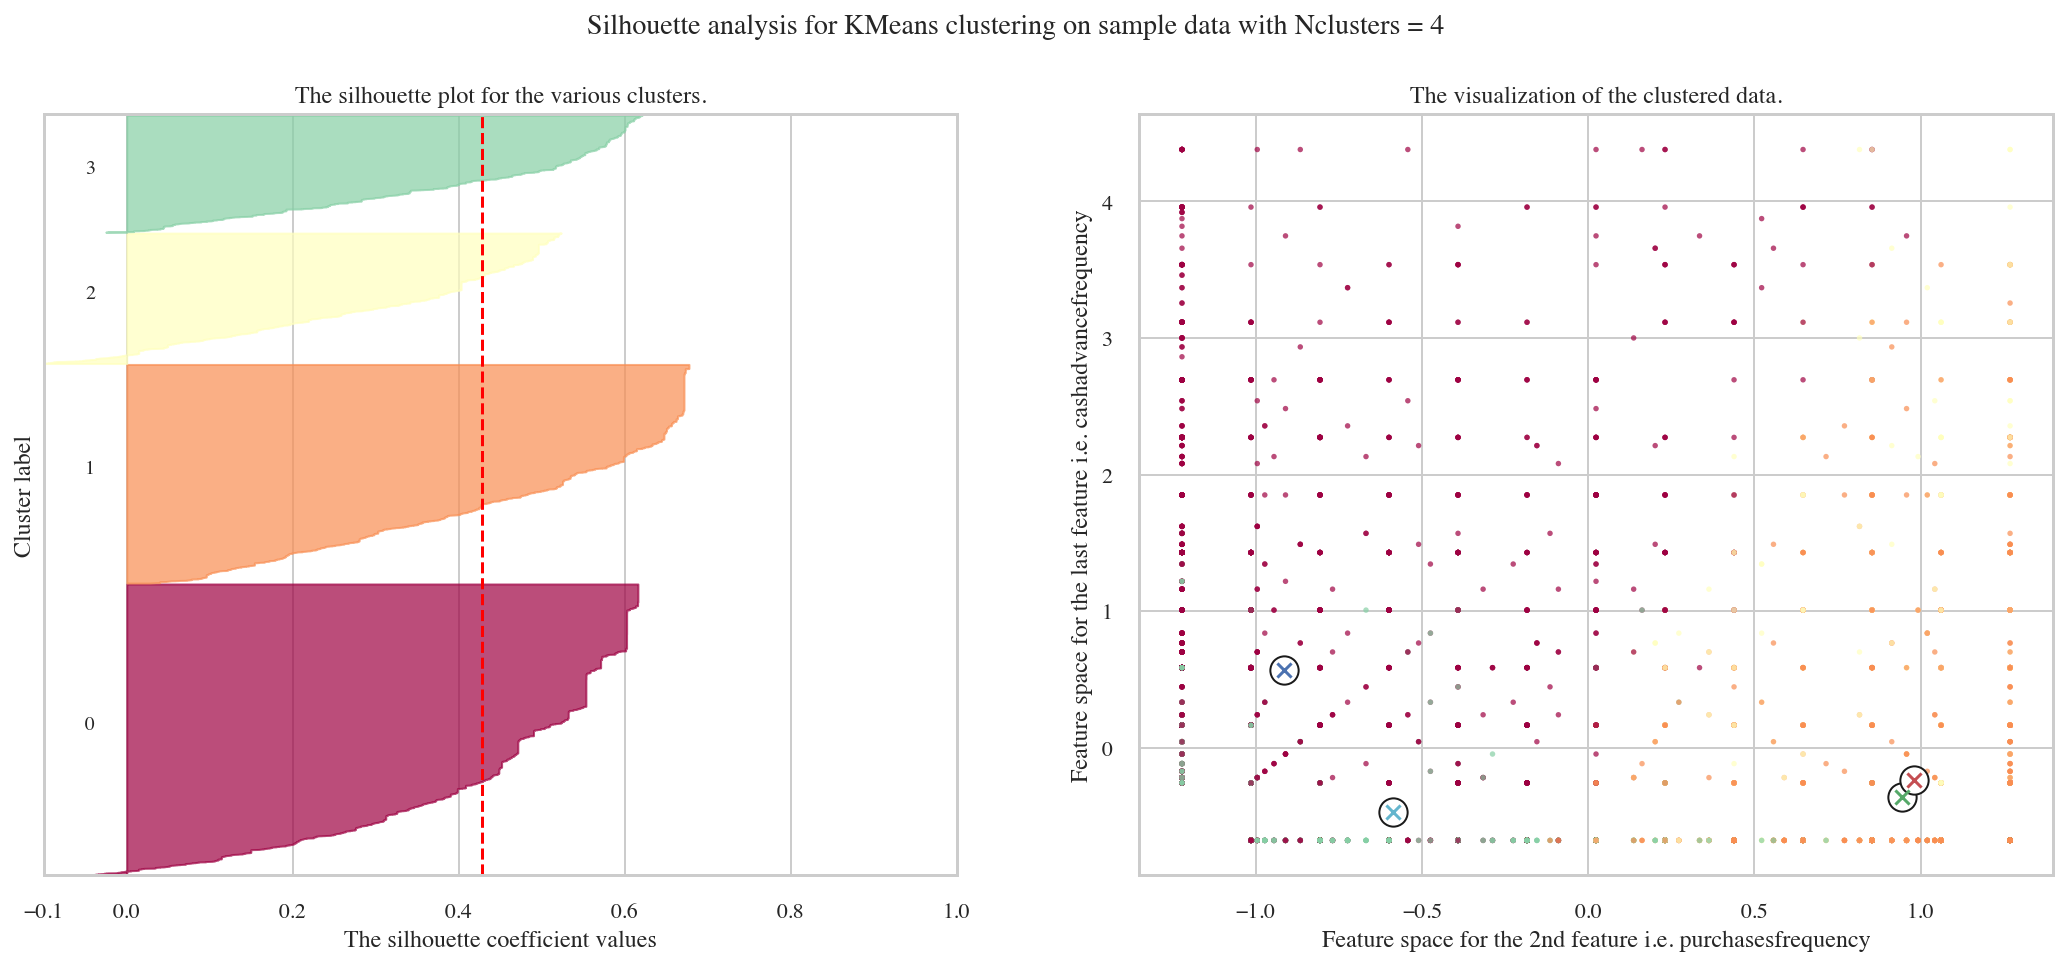

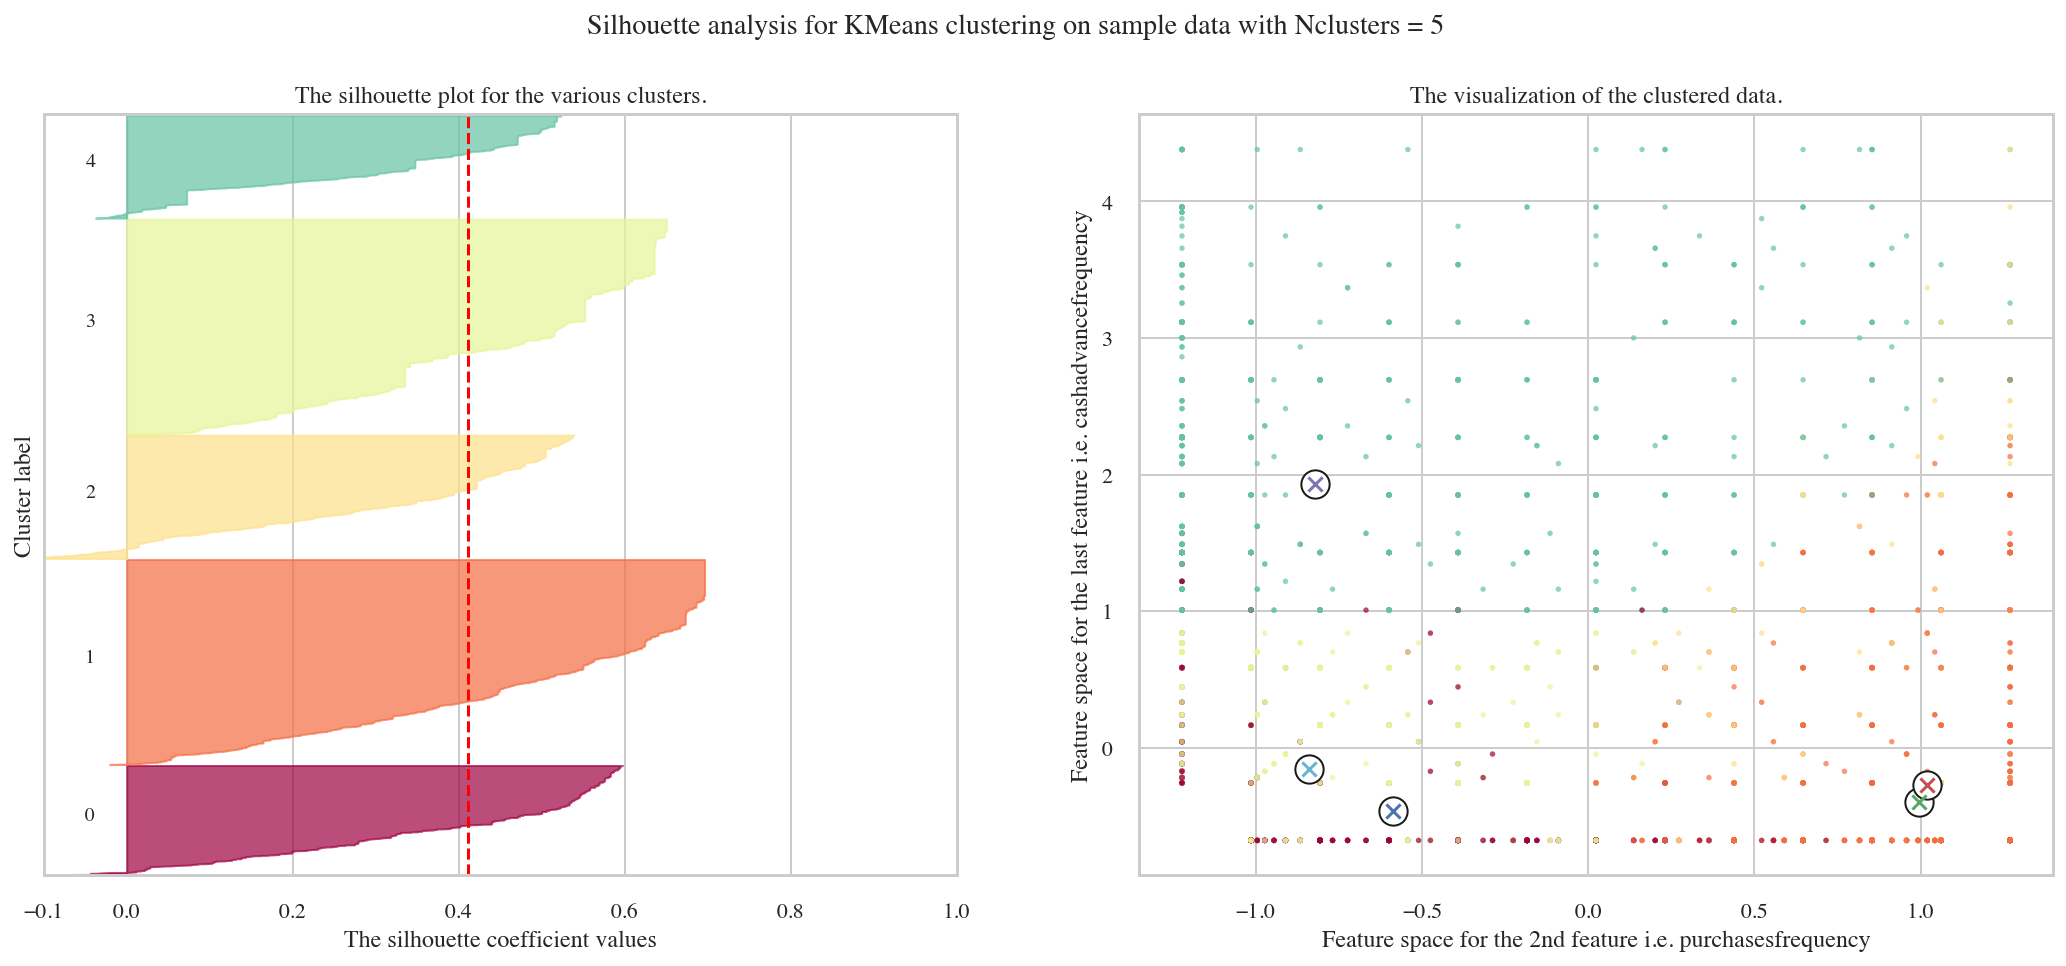

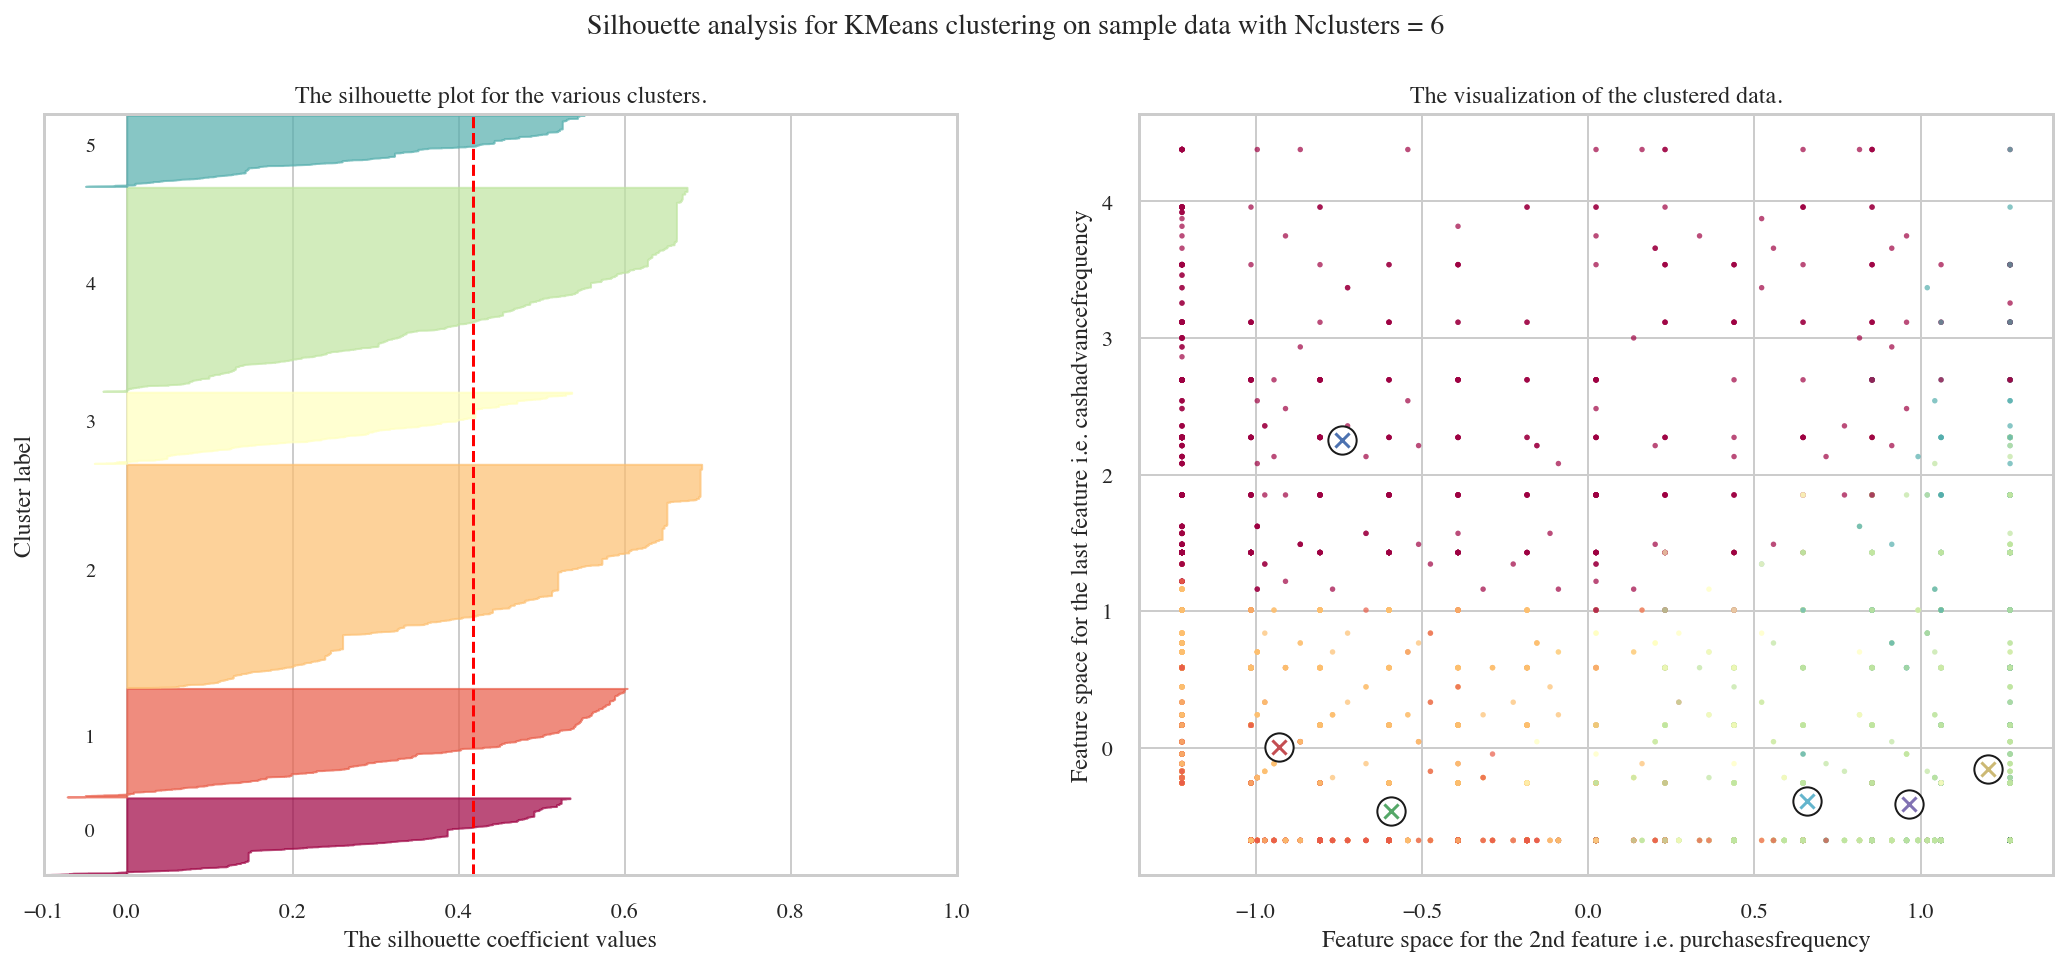

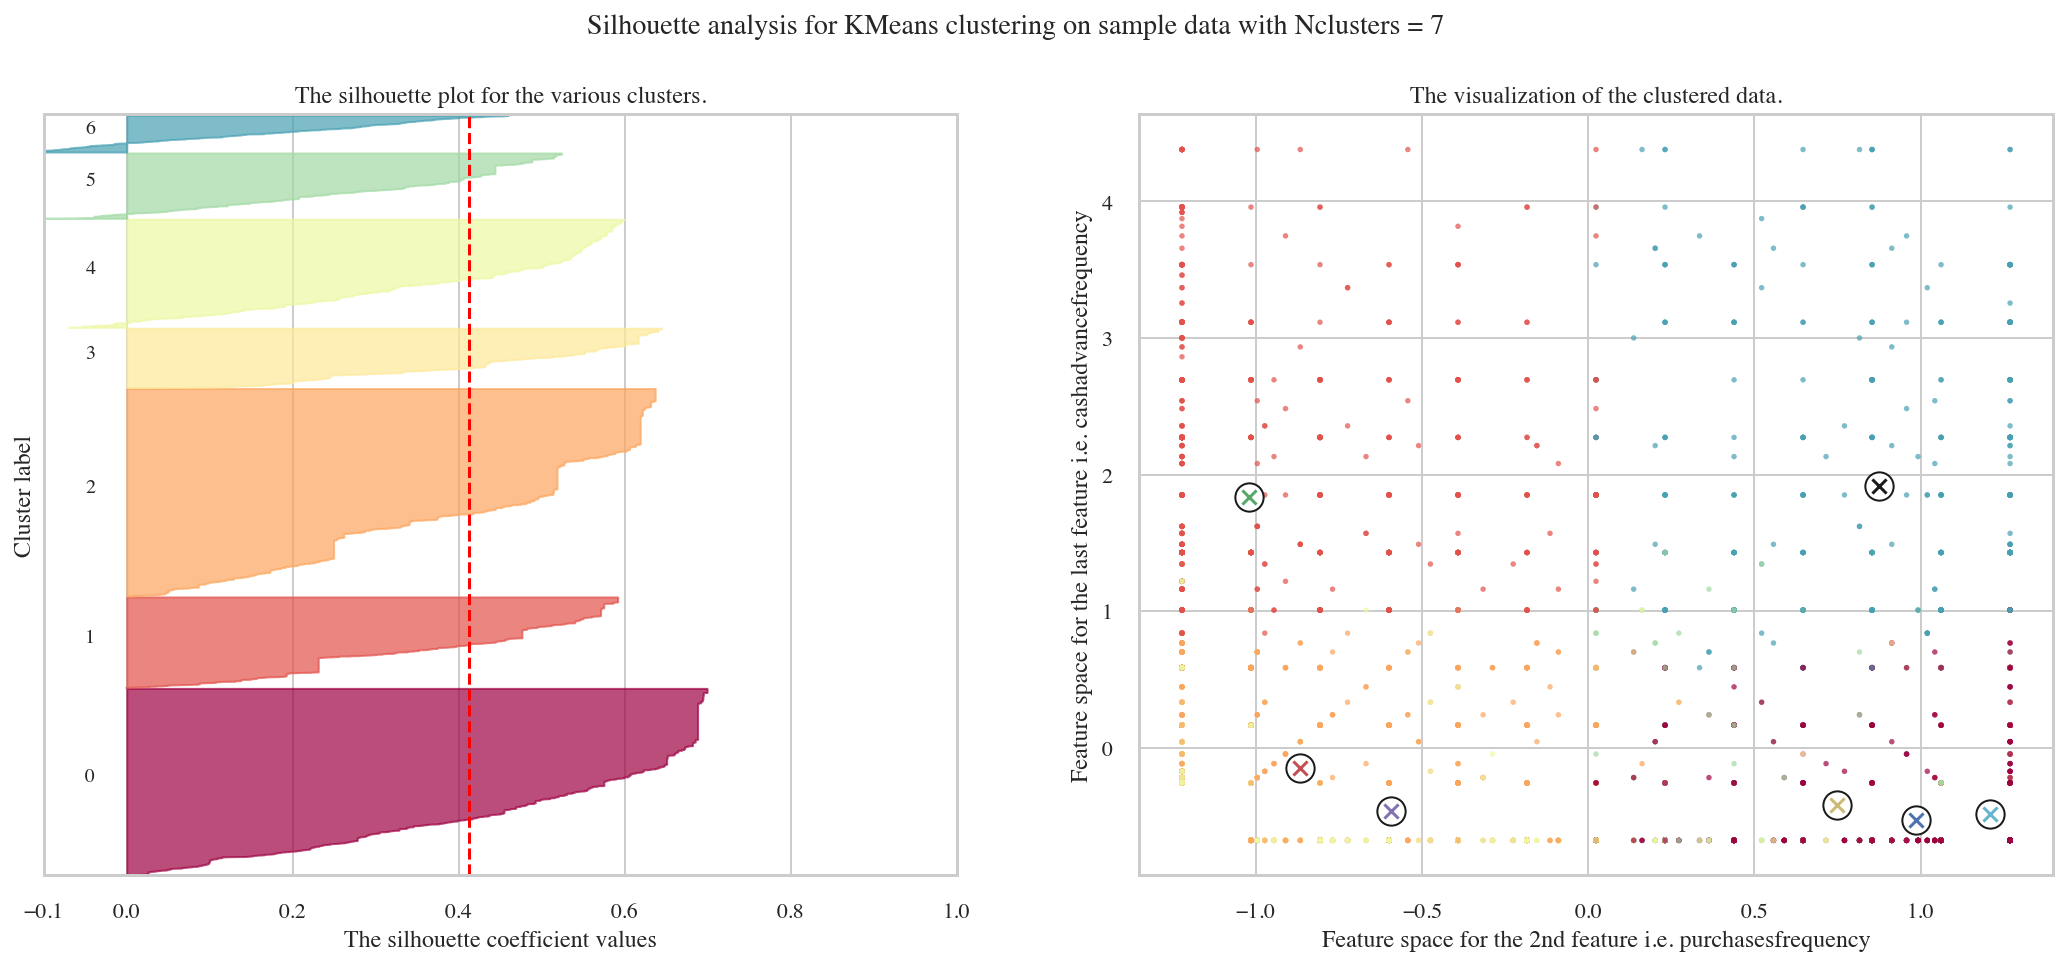

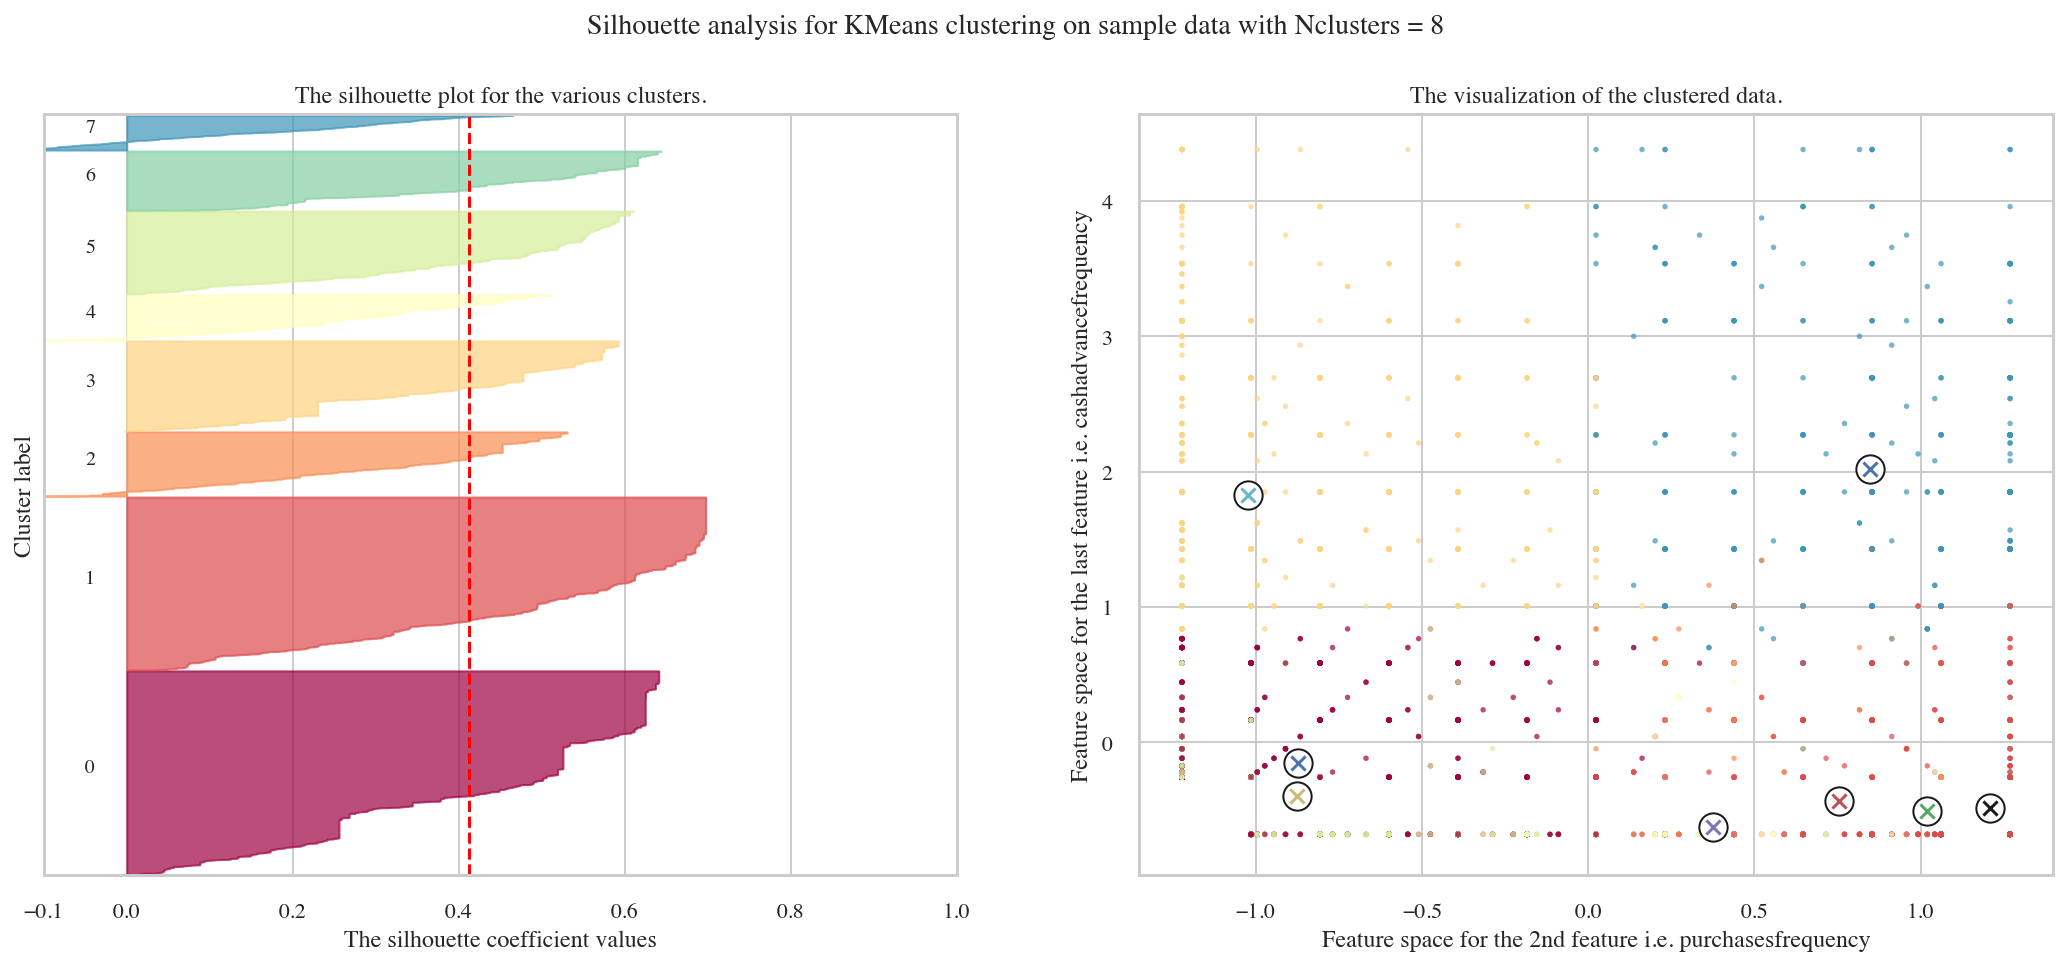

In [166]:
X = X_scaled

cluster_centers = dict()
kmeans_per_k = []

for n_clusters in range(3,9,1):
    print("k={}".format(n_clusters))    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    kmeans_per_k.append(clusterer)
    
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 1
    feature2 = -1
    
    ax2.scatter(X.iloc[:, feature1], X.iloc[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='x', alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 2nd feature i.e. purchasesfrequency")
    ax2.set_ylabel("Feature space for the last feature i.e. cashadvancefrequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with Nclusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

<Figure size 576x252 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Inertia')

Text(0.55, 0.55, 'Elbow')

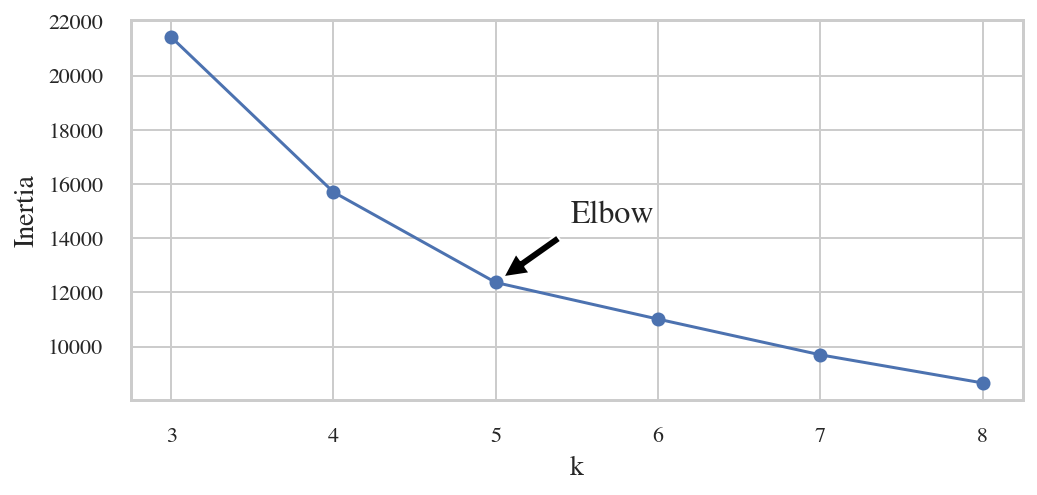

In [154]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(3, 9, 1), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.axis([2, 8.5, 0, 8300])
plt.show()

In [167]:
# find cluster centers and re-transforming back to normal fromm log and scaled version
for i in range(3,9,1):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(cent_transformed, columns=X_scaled.columns))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
(3, 5) 5
   balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
0          0.395605            0.272701                  0.072075   
1          0.968544            0.887941                  0.354641   
2          0.970813            0.136162                  0.085828   

   purchasesinstallmentsfrequency  cashadvancefrequency  
0                        0.191246              0.040302  
1                        0.710201              0.070939  
2                        0.050036              0.242853  
Silhouette score for cluster 3 is 0.39508616149211256

for 4 number of clusters
(4, 5) 5
   balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
0          0.971148            0.123481                  0.077595   
1          0.955406            0.869822                  0.092967   
2          0.975862            0.884488                  0.780606   
3          0.386907            0.254759                  0.073174   

   purchasesinstallmen

## assign menbership

In [173]:
clusters = kmeans_per_k[2].predict(X)     # from elbow curve
X["Cluster"] = clusters

In [174]:
X.head()

balancefrequency  purchasesfrequency  oneoffpurchasesfrequency  \
0         -0.248965           -0.807206                 -0.678604   
1          0.134664           -1.222447                 -0.678604   
2          0.518292            1.268997                  2.672398   
3         -1.016222           -1.014828                 -0.399355   
4          0.518292           -1.014828                 -0.399355   

   purchasesinstallmentsfrequency  cashadvancefrequency  Cluster  
0                       -0.708083             -0.678978        3  
1                       -0.917751              0.585903        3  
2                       -0.917751             -0.678978        2  
3                       -0.917751             -0.257353        0  
4                       -0.917751             -0.678978        3

# Visualizatioin

## PCA


In [176]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [177]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [178]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [179]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


In [180]:
# We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns.
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [181]:
# we create one new column for plotX so that we can use it for 1-D visualization.

plotX["dummy"] = 0

Each of these new DataFrames will hold all of the values contained in exacltly one of the clusters. For example, all of the values contained within the DataFrame, cluster0 will belong to 'cluster 0', and all the values contained in DataFrame, cluster1 will belong to 'cluster 1', etc.

In [182]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]
cluster4 = plotX[plotX["Cluster"] == 4]

In [185]:

init_notebook_mode(connected=True)

In [190]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color ='magenta'),
                    text = None)



trace5 = go.Scatter(
                    x = cluster4["PC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color ='red'),
                    text = None)


data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [193]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


trace4 = go.Scatter(
                    x = cluster3["PC2_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color ='magenta'),
                    text = None)



trace5 = go.Scatter(
                    x = cluster4["PC2_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color ='red'),
                    text = None)


data = [trace1, trace2, trace3, trace4, trace5]


title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [194]:
# Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'magenta'),
                    text = None)

trace5 = go.Scatter3d(
                    x = cluster4["PC1_3d"],
                    y = cluster4["PC2_3d"],
                    z = cluster4["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'yellow'),
                    text = None)


data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## T-Distributed Stochastic Neighbor Embedding (T-SNE)
Our next method for visualizing our clusters is T-Distributed Stochastic Neighbor Embedding (T-SNE).

Here is a good video by Google that gives a quick overview of what the algorithm does. And here is a video that gives a helpful and simplified explanation of how the algorithm does what it does, if you're interested.


- https://www.youtube.com/watch?v=wvsE8jm1GzE
- https://www.youtube.com/watch?v=NEaUSP4YerM

 we have to decide what level of perplexity we would like to use for our T-SNE algorithm. The perplexity is a hyperparameter used in the T-SNE algorithm that greatly determines how the data returned from the algorithm is distributed.

To see the role that perplexity plays in shaping the distibution of the data through T-SNE, check out this clearly written, and interactive article by some of the Engineers/Scientists at Google Brain.

https://ai.google/research/teams/brain

In [195]:
perplexity = 50
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)


#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [196]:
# rename
TCs_1d.columns = ["TC1_1d"]
PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns.

In [197]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [198]:
plotX["dummy"] = 0

In [199]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]
cluster4 = plotX[plotX["Cluster"] == 4]

In [202]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


trace4 = go.Scatter(
                    x = cluster3["TC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'magenta'),
                    text = None)
trace5 = go.Scatter(
                    x = cluster4["TC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'yellow'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [204]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["TC1_2d"],
                    y = cluster3["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'blue'),
                    text = None)
trace5 = go.Scatter(
                    x = cluster4["TC1_2d"],
                    y = cluster4["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'yellow'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [206]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter3d(
                    x = cluster3["TC1_3d"],
                    y = cluster3["TC2_3d"],
                    z = cluster3["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'blue'),
                    text = None)

trace5 = go.Scatter3d(
                    x = cluster4["TC1_3d"],
                    y = cluster4["TC2_3d"],
                    z = cluster4["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'yellow'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#put-into-different-bins-for-some-features?-like-frequent,-mild,-never?" data-toc-modified-id="put-into-different-bins-for-some-features?-like-frequent,-mild,-never?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>put into different bins for some features? like frequent, mild, never?</a></span></li></ul></li><li><span><a href="#Analysis/Modeling" data-toc-modified-id="Analysis/Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis/Modeling</a></span><ul class="toc-item"><li><span><a href="#Elbow-curve" data-toc-modified-id="Elbow-curve-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Elbow curve</a></span></li><li><span><a href="#repeat-clustering,-after-putting-into-bins-and-then-encode" data-toc-modified-id="repeat-clustering,-after-putting-into-bins-and-then-encode-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>repeat clustering, after putting into bins and then encode</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#kmeans-without-putting-the-frequencies-into-bins----so-it's-continous-numerical-values" data-toc-modified-id="kmeans-without-putting-the-frequencies-into-bins----so-it's-continous-numerical-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>kmeans without putting the frequencies into bins -- so it's continous numerical values</a></span></li><li><span><a href="#assign-menbership" data-toc-modified-id="assign-menbership-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>assign menbership</a></span></li></ul></li><li><span><a href="#Visualizatioin" data-toc-modified-id="Visualizatioin-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizatioin</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#T-Distributed-Stochastic-Neighbor-Embedding-(T-SNE)" data-toc-modified-id="T-Distributed-Stochastic-Neighbor-Embedding-(T-SNE)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>T-Distributed Stochastic Neighbor Embedding (T-SNE)</a></span></li></ul></li></ul></div>